[View in Colaboratory](https://colab.research.google.com/github/gauravsingh1012/Data_Analysis_and_Visualisation/blob/master/5_Primer_on_zipline_with_pyfolio_and_Tensorboard.ipynb)

In [1]:
!pip install zipline

    100% |████████████████████████████████| 2.5MB 9.0MB/s 
    100% |████████████████████████████████| 92kB 23.1MB/s 
    100% |████████████████████████████████| 112kB 23.8MB/s 
    100% |████████████████████████████████| 3.4MB 966kB/s 
    100% |████████████████████████████████| 143kB 14.5MB/s 
    100% |████████████████████████████████| 112kB 33.1MB/s 
    100% |████████████████████████████████| 1.3MB 15.5MB/s 
    100% |████████████████████████████████| 163kB 33.6MB/s 
    100% |████████████████████████████████| 624kB 28.0MB/s 
    100% |████████████████████████████████| 81kB 26.6MB/s 
    100% |████████████████████████████████| 573kB 17.0MB/s 
    100% |████████████████████████████████| 5.6MB 5.0MB/s 
    100% |████████████████████████████████| 163kB 25.8MB/s 
    100% |████████████████████████████████| 51kB 22.0MB/s 
    100% |████████████████████████████████| 3.8MB 936kB/s 
    100% |████████████████████████████████| 71kB 28.0MB/s 
    100% |████████████████████████████████| 5.8M

In [2]:
!zipline ingest -b quantopian-quandl

[2018-10-04 09:58:12.753259] INFO: zipline.data.bundles.quandl: Writing data to /root/.zipline/data/quantopian-quandl/2018-10-04T09;58;04.351959.


In [3]:
ls -latr /root/.zipline/data/quantopian*

total 12
drwxr-xr-x 3 root root 4096 Oct  4 09:58  ../
drwxr-xr-x 4 root root 4096 Oct  4 09:58 '2018-10-04T09;58;04.351959'/
drwxr-xr-x 3 root root 4096 Oct  4 09:58  ./


In [0]:
%load_ext zipline

In [0]:
from zipline.api import order, record, symbol
import zipline


def initalize(conext):
  pass

def handle_data(context,data):
  order(symbol('AAPL'),10)
  record(AAPL=data.current(symbol('AAPL'),"price"))  

In [0]:
import pytz
from datetime import datetime

start = datetime(2004, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2016, 1, 1, 0, 0, 0, 0, pytz.utc)



results = zipline.run_algorithm(start = start,
                  end = end,
                  initialize = initalize,
                  capital_base = 100000,
                  handle_data=handle_data,
                  before_trading_start=None,
                  analyze=None,
                  bundle='quantopian-quandl')

In [7]:
results.head(1)

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2004-01-02 21:00:00+00:00,21.28,NaN,0.0,NaN,-0.008645,NaN,NaN,0.0,100000.0,0.0,...,0.0,0.0,0,NaN,100000.0,0.0,0.0,1,[],0.0


In [0]:
#%zipline --bundle quantopian-quandl --start 2008-1-1 --end 2018-1-1 -o backtest.pickle

In [0]:
#import pandas as pd
#import matplotlib.pyplot as plt
#from matplotlib import style
#style.use('ggplot')
#backtest_df = pd.read_pickle("backtest.pickle")
#backtest_df['portfolio_value'].plot()

In [0]:
#backtest_df.columns

In [11]:
!pip install tensorboardcolab

  Running setup.py bdist_wheel for tensorboardcolab ... - done
  Stored in directory: /root/.cache/pip/wheels/ab/74/02/cda602d1dc28b2f12eab313c49b9bfa14d6371326bc2590e06
Successfully built tensorboardcolab


In [12]:
import os

os.chdir('/content')
!rm -rf Data_Analysis_and_Visualisation
!git clone https://github.com/gauravsingh1012/Data_Analysis_and_Visualisation.git
os.chdir('/content/Data_Analysis_and_Visualisation')

Cloning into 'Data_Analysis_and_Visualisation'...
remote: Counting objects: 157, done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 157 (delta 8), reused 11 (delta 4), pack-reused 142
Receiving objects: 100% (157/157), 33.62 MiB | 18.13 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (11/11), done.


In [13]:
%%zipline --bundle quantopian-quandl --start 2004-1-1 --end 2010-1-1 -o results.pickle
# Zipline trading algorithm
# Taken from zipline.examples.olmar

import numpy as np
import logbook
import sys
from TensorBoard import TensorBoard
from zipline.finance import commission, slippage
from zipline.algorithm import TradingAlgorithm

zipline_logging = logbook.NestedSetup([
    logbook.StreamHandler(sys.stdout, level=logbook.INFO),
    logbook.StreamHandler(sys.stderr, level=logbook.ERROR),
])
zipline_logging.push_application()

STOCKS = ['AMD', 'CERN', 'COST', 'DELL', 'GPS', 'INTC', 'MMM']

# On-Line Portfolio Moving Average Reversion

# More info can be found in the corresponding paper:
# http://icml.cc/2012/papers/168.pdf
def initialize(algo, eps=1, window_length=5):
    algo.stocks = STOCKS
    algo.sids = [algo.symbol(symbol) for symbol in algo.stocks]
    algo.m = len(algo.stocks)
    algo.price = {}
    algo.b_t = np.ones(algo.m) / algo.m
    algo.eps = eps
    algo.window_length = window_length
    
    
    algo.tensorboard = TensorBoard()

    algo.set_commission(commission.PerShare(cost=0))
    algo.set_slippage(slippage.FixedSlippage(spread=0))


def handle_data(algo, data):
    m = algo.m

    x_tilde = np.zeros(m)
    b = np.zeros(m)

    # find relative moving average price for each asset
    mavgs = data.history(algo.sids, 'price', algo.window_length, '1d').mean()
    for i, sid in enumerate(algo.sids):
        price = data.current(sid, "price")
        # Relative mean deviation
        x_tilde[i] = mavgs[sid] / price

    ###########################
    # Inside of OLMAR (algo 2)
    x_bar = x_tilde.mean()

    # market relative deviation
    mark_rel_dev = x_tilde - x_bar

    # Expected return with current portfolio
    exp_return = np.dot(algo.b_t, x_tilde)
    weight = algo.eps - exp_return
    variability = (np.linalg.norm(mark_rel_dev)) ** 2

    # test for divide-by-zero case
    if variability == 0.0:
        step_size = 0
    else:
        step_size = max(0, weight / variability)

    b = algo.b_t + step_size * mark_rel_dev
    b_norm = simplex_projection(b)
    np.testing.assert_almost_equal(b_norm.sum(), 1)

    rebalance_portfolio(algo, data, b_norm)

    # update portfolio
    algo.b_t = b_norm
    
    # record something to show that these get logged
    # to tensorboard as well:    
    algo.record(x_bar=x_bar)

    if algo.tensorboard is not None:
        algo.tensorboard.log_algo(algo)


def rebalance_portfolio(algo, data, desired_port):
    # rebalance portfolio
    for i, sid in enumerate(algo.sids):
        algo.order_target_percent(sid, desired_port[i])


def simplex_projection(v, b=1):
    """Projection vectors to the simplex domain
    Implemented according to the paper: Efficient projections onto the
    l1-ball for learning in high dimensions, John Duchi, et al. ICML 2008.
    Implementation Time: 2011 June 17 by Bin@libin AT pmail.ntu.edu.sg
    Optimization Problem: min_{w}\| w - v \|_{2}^{2}
    s.t. sum_{i=1}^{m}=z, w_{i}\geq 0
    Input: A vector v \in R^{m}, and a scalar z > 0 (default=1)
    Output: Projection vector w
    :Example:
    >>> proj = simplex_projection([.4 ,.3, -.4, .5])
    >>> print(proj)
    array([ 0.33333333, 0.23333333, 0. , 0.43333333])
    >>> print(proj.sum())
    1.0
    Original matlab implementation: John Duchi (jduchi@cs.berkeley.edu)
    Python-port: Copyright 2013 by Thomas Wiecki (thomas.wiecki@gmail.com).
    """

    v = np.asarray(v)
    p = len(v)

    # Sort v into u in descending order
    v = (v > 0) * v
    u = np.sort(v)[::-1]
    sv = np.cumsum(u)

    rho = np.where(u > (sv - b) / np.arange(1, p + 1))[0][-1]
    theta = np.max([0, (sv[rho] - b) / (rho + 1)])
    w = (v - theta)
    w[w < 0] = 0
    return w


Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://dc898dd2.ngrok.io
TensorBoard Initialized


/usr/local/lib/python3.6/dist-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/usr/local/lib/python3.6/dist-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/usr/local/lib/python3.6/dist-packages/empyrical/stats.py:790: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


[2018-10-04 10:01:52.411105] INFO: zipline.finance.metrics.tracker: Simulated 1511 trading days
first open: 2004-01-02 14:31:00+00:00
last close: 2009-12-31 21:00:00+00:00


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,x_bar
2004-01-02 21:00:00+00:00,NaN,0.000000,NaN,-0.008645,NaN,NaN,0.00,1.000000e+07,0.000000e+00,0.000000e+00,...,0.0,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,1,[],0.0,1.004868
2004-01-05 21:00:00+00:00,0.000000,0.000000,NaN,-0.017215,0.000000,NaN,-10126240.51,-1.262405e+05,1.012624e+07,1.012624e+07,...,0.0,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,2,"[{'amount': 96135, 'dt': 2004-01-05 21:00:00+0...",0.0,0.996124
2004-01-06 21:00:00+00:00,0.072181,0.007876,NaN,-0.025712,0.000000,NaN,109847.75,-1.639276e+04,1.009515e+07,1.009515e+07,...,0.0,0,NaN,-1.262405e+05,1.012624e+07,1.012624e+07,3,"[{'amount': -10571, 'dt': 2004-01-06 21:00:00+...",0.0,0.990246
2004-01-07 21:00:00+00:00,0.064697,0.013910,NaN,-0.034134,0.000000,NaN,38098.34,2.170558e+04,1.011740e+07,1.011740e+07,...,0.0,0,NaN,-1.639276e+04,1.009515e+07,1.009515e+07,4,"[{'amount': -85564, 'dt': 2004-01-07 21:00:00+...",0.0,0.986274
2004-01-08 21:00:00+00:00,0.202046,-0.010300,NaN,-0.042484,0.000000,NaN,15955.16,3.766074e+04,9.859341e+06,9.859341e+06,...,0.0,0,-2.977554,2.170558e+04,1.011740e+07,1.011740e+07,5,"[{'amount': -5800, 'dt': 2004-01-08 21:00:00+0...",0.0,1.002437
2004-01-09 21:00:00+00:00,0.181404,-0.009871,NaN,-0.050762,0.000000,NaN,-35493.79,2.166950e+03,9.899121e+06,9.899121e+06,...,0.0,0,-2.600576,3.766074e+04,9.859341e+06,9.859341e+06,6,"[{'amount': -1488, 'dt': 2004-01-09 21:00:00+0...",0.0,1.010776
2004-01-12 21:00:00+00:00,0.169354,-0.005599,NaN,-0.058968,0.000000,NaN,-3383.39,-1.216440e+03,9.945227e+06,9.945227e+06,...,0.0,0,-1.323460,2.166950e+03,9.899121e+06,9.899121e+06,7,"[{'amount': 832, 'dt': 2004-01-12 21:00:00+00:...",0.0,1.003989
2004-01-13 21:00:00+00:00,0.162138,-0.013664,NaN,-0.067104,0.000000,NaN,-622.71,-1.839150e+03,9.865204e+06,9.865204e+06,...,0.0,0,-2.977182,-1.216440e+03,9.945227e+06,9.945227e+06,8,"[{'amount': -803, 'dt': 2004-01-13 21:00:00+00...",0.0,1.015137
2004-01-14 21:00:00+00:00,0.156543,-0.008086,NaN,-0.075168,0.000000,NaN,231.70,-1.607450e+03,9.920746e+06,9.920746e+06,...,0.0,0,-1.620372,-1.839150e+03,9.865204e+06,9.865204e+06,9,"[{'amount': 1865, 'dt': 2004-01-14 21:00:00+00...",0.0,1.002910
2004-01-15 21:00:00+00:00,0.147731,-0.010212,NaN,-0.083164,0.000000,NaN,-2959.58,-4.567030e+03,9.902449e+06,9.902449e+06,...,0.0,0,-1.956761,-1.607450e+03,9.920746e+06,9.920746e+06,10,"[{'amount': 8281, 'dt': 2004-01-15 21:00:00+00...",0.0,1.002608


In [14]:
start = datetime(2004, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2010, 1, 1, 0, 0, 0, 0, pytz.utc)

results = zipline.run_algorithm(start = start,
                  end = end,
                  initialize = initalize,
                  capital_base = 100000,
                  handle_data=handle_data,
                  before_trading_start=None,
                  analyze=None,
                  bundle='quantopian-quandl')

[2018-10-04 10:01:54.041438] WARNING: Loader: Refusing to download new benchmark data because a download succeeded at 2018-10-04 09:58:23.860861+00:00.
[2018-10-04 10:01:55.160670] INFO: Performance: after split: asset: Equity(8 [AAPL]), amount: 5780, cost_basis: 20.46, last_sale_price: 88.99
[2018-10-04 10:01:55.161646] INFO: Performance: returning cash: 0.0
[2018-10-04 10:01:57.149533] INFO: zipline.finance.metrics.tracker: Simulated 1511 trading days
first open: 2004-01-02 14:31:00+00:00
last close: 2009-12-31 21:00:00+00:00


In [15]:
!pip install pyfolio

    100% |████████████████████████████████| 92kB 4.3MB/s 
  Running setup.py bdist_wheel for pyfolio ... - done
  Stored in directory: /root/.cache/pip/wheels/37/9b/a6/199481975c168cc22c6161fbf8a6f0e6037d6e2faf2d0fba53
Successfully built pyfolio


In [0]:
import pandas as pd

import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

results = pd.read_pickle('results.pickle')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [0]:
returns_dupe = returns.copy()

Text(0.5,0,'Date')

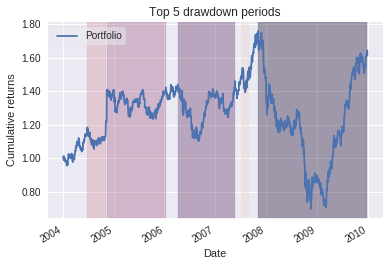

In [18]:
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,60.30,2007-11-06,2008-11-20,NaT,NaN
1,23.24,2006-04-06,2006-09-07,2007-05-22,294
2,12.51,2004-11-15,2005-10-12,2006-01-11,303
3,10.90,2004-06-25,2004-08-12,2004-11-04,95
4,9.47,2007-07-16,2007-08-06,2007-09-04,37


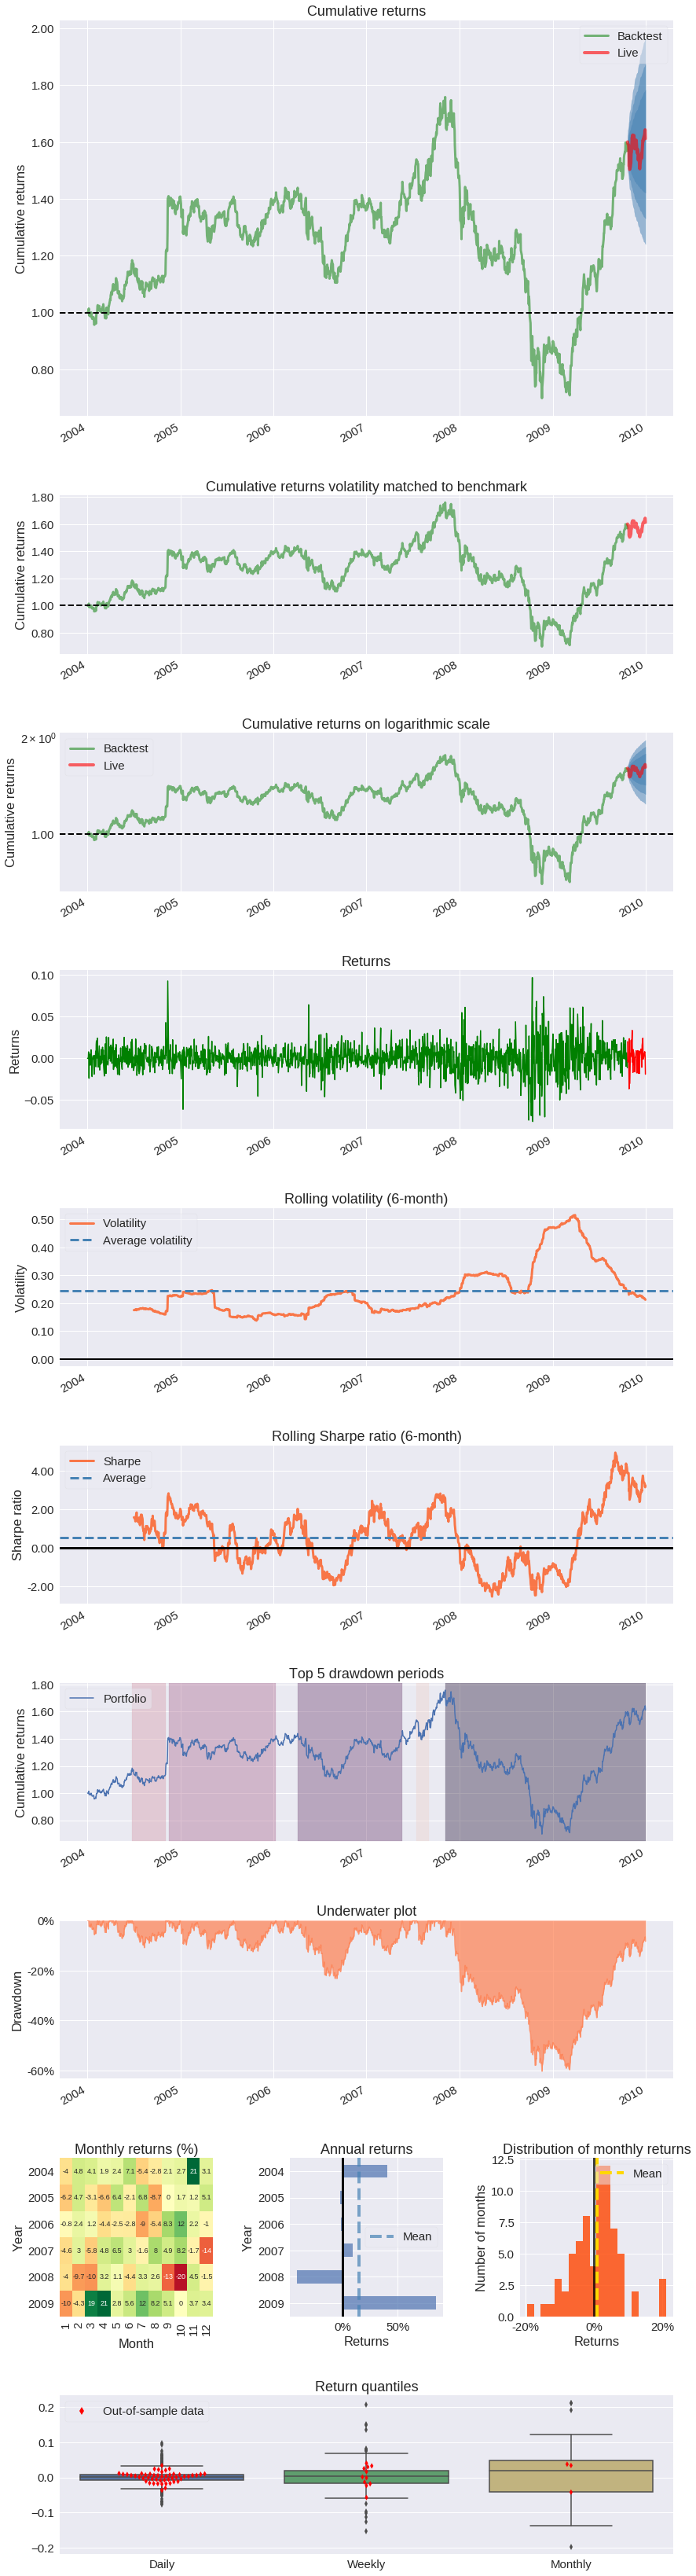

Stress Events,mean,min,max
Lehmann,-0.28%,-7.41%,4.40%
Aug07,0.35%,-2.96%,3.03%
Mar08,-0.43%,-3.10%,3.34%
Sept08,-0.68%,-7.41%,3.99%
2009Q1,-0.35%,-4.98%,3.36%
2009Q2,0.71%,-3.78%,6.17%
Low Volatility Bull Market,0.01%,-6.11%,6.45%
GFC Crash,-0.08%,-7.58%,9.71%
Recovery,0.32%,-3.78%,6.17%


AttributeError: ignored

In [19]:
pf.create_full_tear_sheet(returns=returns, positions=positions, transactions=transactions,live_start_date='2009-10-22', hide_positions=True)

In [0]:
# define our sector mappings
sect_map = {'COST': 'Consumer Goods',
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}

Top 10 long positions of all time,max
sid,
COST,100.74%
MMM,92.35%
CERN,84.47%
DELL,72.76%
AMD,71.05%
INTC,69.19%
GPS,62.11%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
COST,100.74%
MMM,92.35%
CERN,84.47%
DELL,72.76%
AMD,71.05%
INTC,69.19%
GPS,62.11%


All positions ever held,max
sid,
COST,100.74%
MMM,92.35%
CERN,84.47%
DELL,72.76%
AMD,71.05%
INTC,69.19%
GPS,62.11%


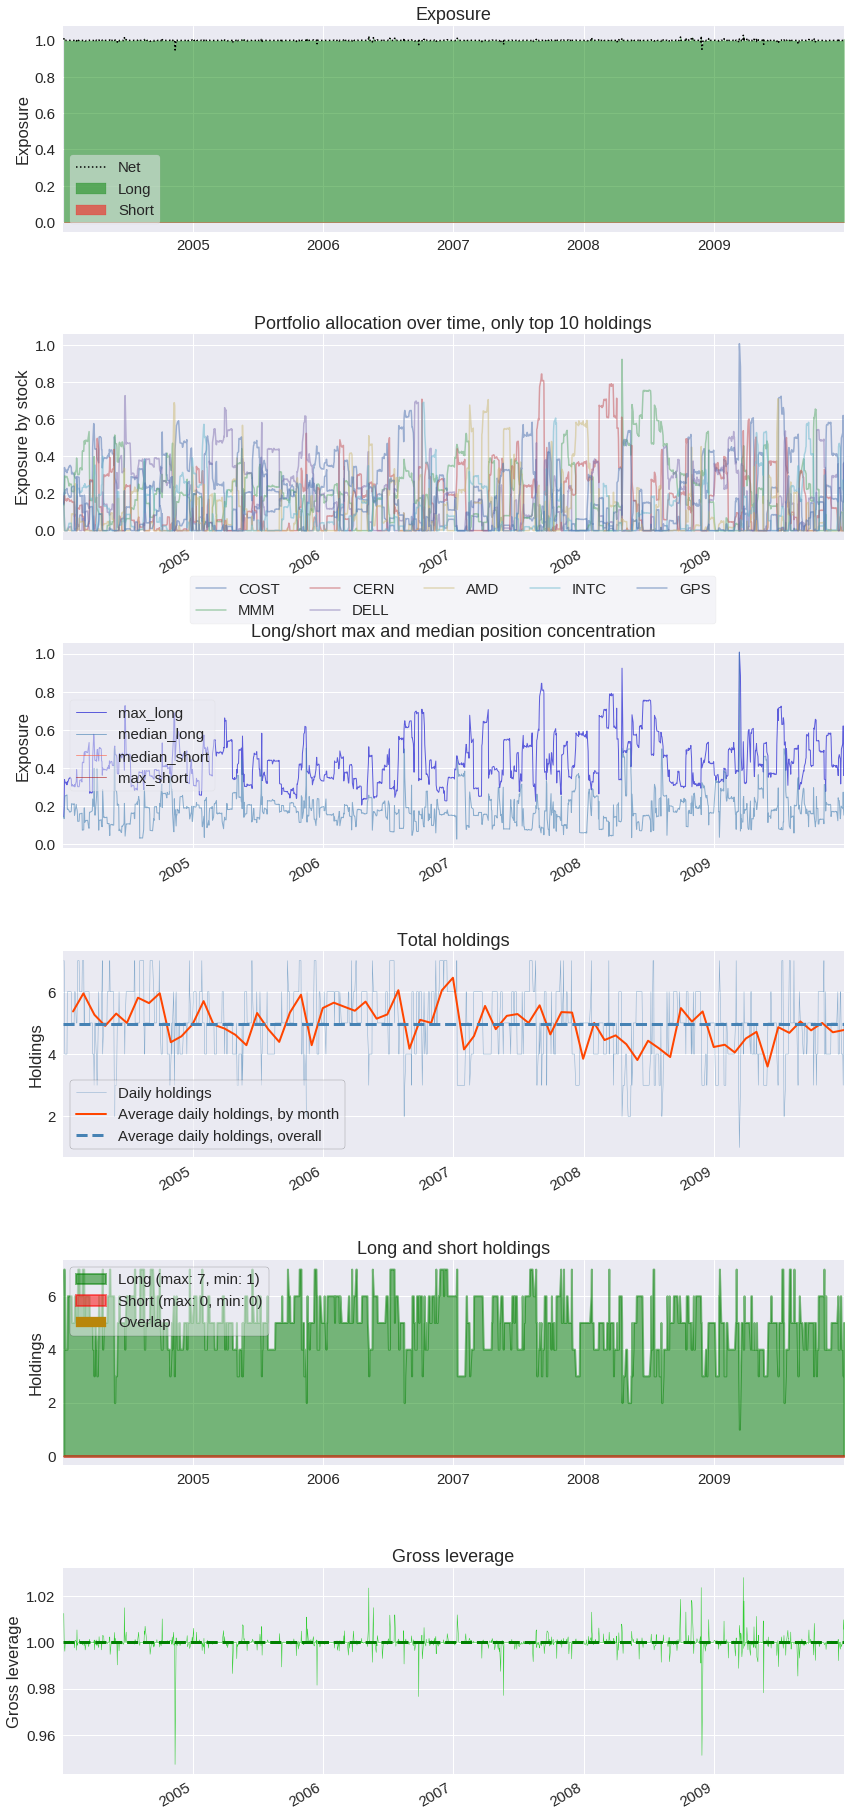

In [21]:
pf.create_position_tear_sheet(returns, positions, sector_mappings=sect_map)

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,3987.00,3.00,3984.00
Percent profitable,0.49,0.00,0.49
Winning round_trips,1936.00,0.00,1936.00
Losing round_trips,2041.00,0.00,2041.00
Even round_trips,10.00,3.00,7.00


PnL stats,All trades,Short trades,Long trades
Total profit,$6120677.93,$0.00,$6120677.93
Gross profit,$37886584.96,$0.00,$37886584.96
Gross loss,$-31765907.03,$0.00,$-31765907.03
Profit factor,$1.19,$nan,$1.19
Avg. trade net profit,$1535.16,$0.00,$1536.31
Avg. winning trade,$19569.52,$nan,$19569.52
Avg. losing trade,$-15563.89,$nan,$-15563.89
Ratio Avg. Win:Avg. Loss,$1.26,$nan,$1.26
Largest winning trade,$1553171.02,$0.00,$1553171.02
Largest losing trade,$-1252529.24,$0.00,$-1252529.24


Duration stats,All trades,Short trades,Long trades
Avg duration,21 days 18:56:23.295711,20:59:59,21 days 19:19:03.976656
Median duration,17 days 23:00:00,20:59:59,18 days 00:00:00
Longest duration,109 days 01:00:00,20:59:59,109 days 01:00:00
Shortest duration,0 days 03:00:01,20:59:59,0 days 03:00:01


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.01%,0.00%,0.01%
Avg returns winning,0.16%,nan%,0.16%
Avg returns losing,-0.13%,nan%,-0.13%
Median returns all round_trips,-0.00%,0.00%,-0.00%
Median returns winning,0.02%,nan%,0.02%
Median returns losing,-0.01%,nan%,-0.01%
Largest winning trade,12.13%,0.00%,12.13%
Largest losing trade,-9.14%,0.00%,-9.14%


Symbol stats,AMD,CERN,COST,DELL,GPS,INTC,MMM
Avg returns all round_trips,-0.00%,0.03%,0.03%,-0.03%,-0.01%,0.04%,0.01%
Avg returns winning,0.37%,0.19%,0.12%,0.13%,0.13%,0.15%,0.10%
Avg returns losing,-0.34%,-0.16%,-0.06%,-0.19%,-0.11%,-0.06%,-0.08%
Median returns all round_trips,-0.00%,0.00%,0.00%,-0.00%,-0.00%,-0.00%,-0.00%
Median returns winning,0.07%,0.02%,0.01%,0.01%,0.02%,0.03%,0.01%
Median returns losing,-0.02%,-0.01%,-0.01%,-0.01%,-0.01%,-0.00%,-0.01%
Largest winning trade,12.13%,5.94%,2.95%,3.36%,3.54%,2.33%,2.22%
Largest losing trade,-9.14%,-4.67%,-3.47%,-6.60%,-8.30%,-4.60%,-4.02%


Profitability (PnL / PnL total) per name,
symbol,
INTC,45.10%
COST,42.42%
CERN,35.52%
MMM,13.51%
GPS,-2.49%
AMD,-7.15%
DELL,-26.91%


Profitability (PnL / PnL total) per name,
symbol,
No Sector Mapping,100.00%


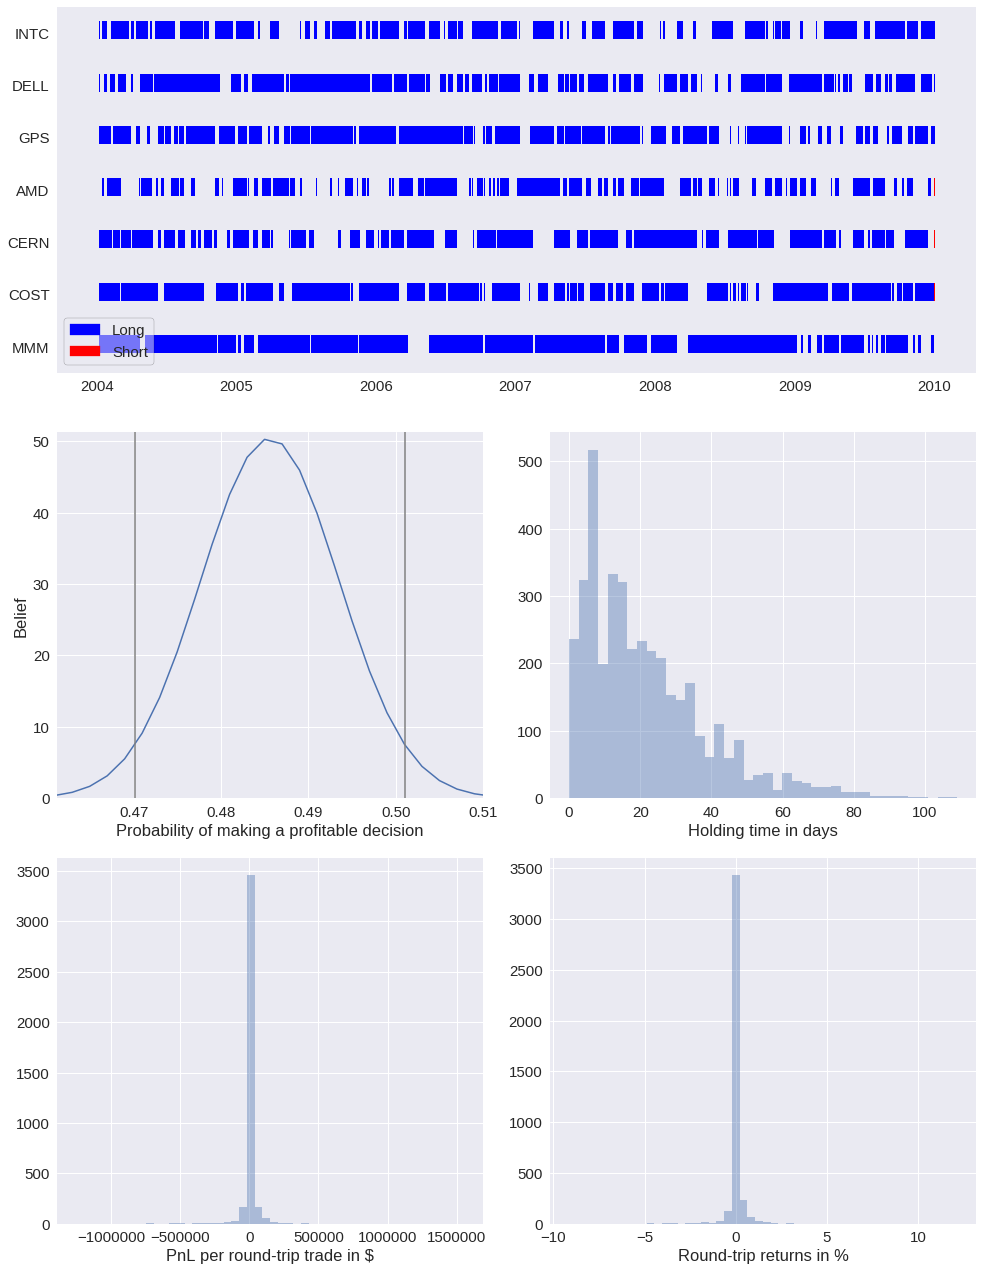

In [22]:
pf.create_round_trip_tear_sheet(returns, positions, transactions, sector_mappings=sect_map)

Start date,2004-01-02
End date,2009-12-31
Total months,71
,Backtest
Annual return,6.3%
Cumulative returns,43.9%
Annual volatility,25.6%
Sharpe ratio,0.36
Calmar ratio,0.10
Stability,0.03
Max drawdown,-60.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,60.94,2007-11-06,2008-11-20,NaT,NaN
1,23.97,2004-11-15,2006-09-07,2007-07-06,690
2,11.02,2004-06-25,2004-08-12,2004-11-05,96
3,9.51,2007-07-16,2007-08-06,2007-09-13,44
4,7.31,2004-04-23,2004-05-17,2004-06-07,32


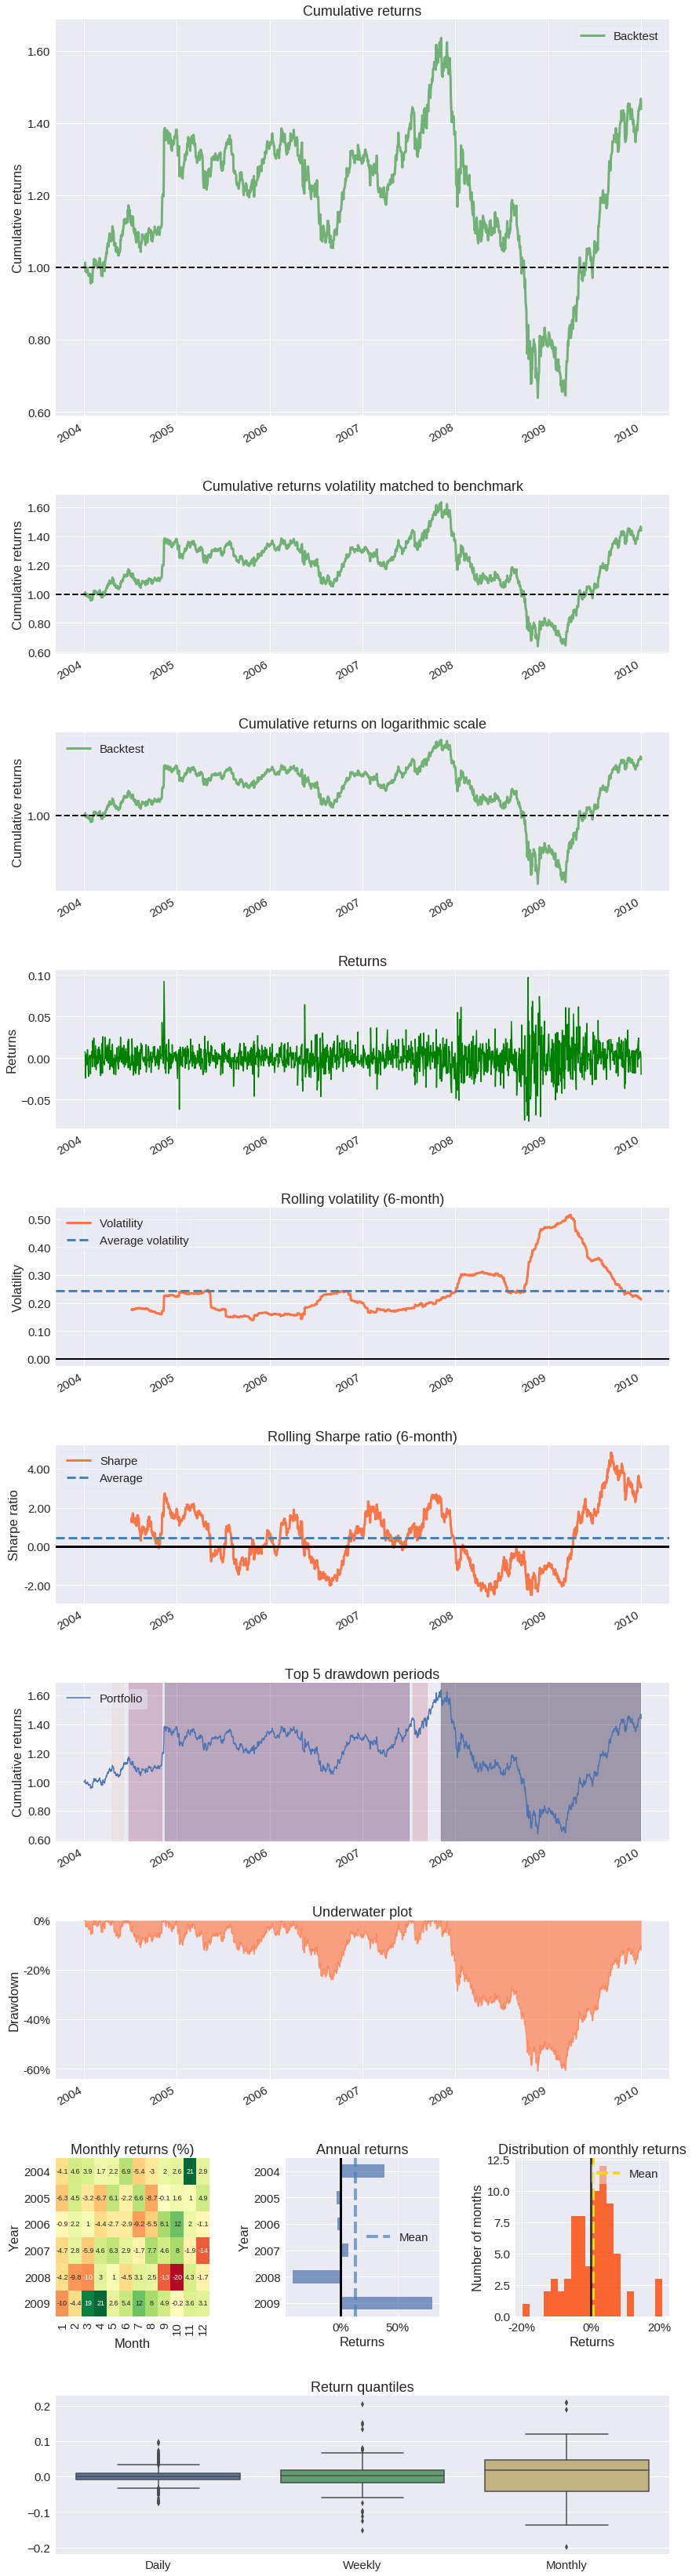

Stress Events,mean,min,max
Lehmann,-0.28%,-7.45%,4.40%
Aug07,0.34%,-2.97%,3.03%
Mar08,-0.44%,-3.10%,3.34%
Sept08,-0.68%,-7.45%,3.99%
2009Q1,-0.36%,-5.00%,3.36%
2009Q2,0.70%,-3.78%,6.17%
Low Volatility Bull Market,0.00%,-6.15%,6.43%
GFC Crash,-0.09%,-7.59%,9.71%
Recovery,0.31%,-3.78%,6.17%


AttributeError: ignored

In [23]:
pf.create_full_tear_sheet(returns, positions, transactions, slippage=5)